In [1]:
#imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Adam\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
sns.set_style('whitegrid')

In [3]:
#need to read data from the web
from pandas_datareader import data, wb

In [4]:
from datetime import datetime
from __future__ import division

In [5]:
#stocks we are going to mess with
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
#as of today
end = datetime.now()
#from one year ago
start = datetime(end.year-1, end.month, end.day)

In [7]:
#loop through stocks and grab their data, cast each stock ticker and make a global varable for our dataframes
for stock in tech_list:
    globals()[stock]= data.DataReader(stock,'yahoo',start,end)

In [8]:
#see our Google data
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-12-29,532.192446,535.482414,530.013375,530.332426,2278500,530.332426
2014-12-30,528.092396,531.152424,527.132366,530.422394,876300,530.422394
2014-12-31,531.252429,532.602384,525.802363,526.402397,1368200,526.402397
2015-01-02,529.012399,531.272443,524.102327,524.812404,1447600,524.812404
2015-01-05,523.262377,524.332389,513.062315,513.872306,2059800,513.872306


In [9]:
#see our Apple data
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,120.296414,121.364900,118.981992,120.154382,5.190328e+07,119.149558
std,7.570619,7.338880,7.807430,7.568283,2.114972e+07,7.305361
min,94.870003,107.370003,92.000000,103.120003,1.302370e+07,102.680478
25%,113.634998,114.549999,112.189999,113.469998,3.750845e+07,112.986358
50%,120.800003,121.809998,119.449997,120.529999,4.709970e+07,120.016268
75%,127.165001,127.934998,125.985000,126.915001,5.969045e+07,125.492359
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,131.380384


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2014-12-29 to 2015-12-24
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Volume       251 non-null int64
Adj Close    251 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


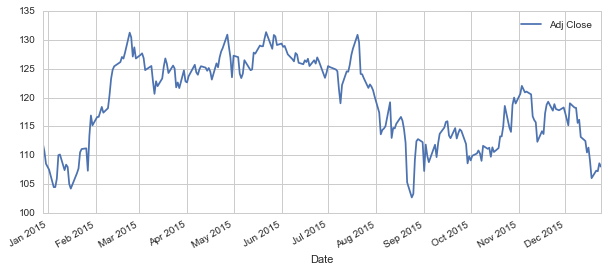

In [11]:
#graph the adjusted closing over the last year
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

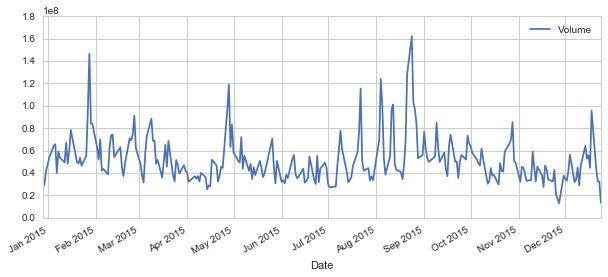

In [12]:
#daily volume of trading
AAPL['Volume'].plot(legend=True, figsize=(10,4))

# To learn more about moving average look it up on investopedia

In [13]:
#moving averages
ma_day = [10,20,50]

#create columns for 10, 20, and 50 day moving averages in AAPL dataframe
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

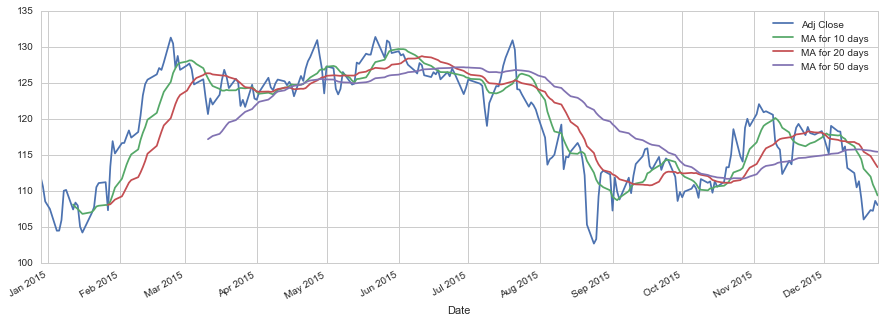

In [14]:
#plot 4 columns together for each MA and adjusted closing
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(15,5))

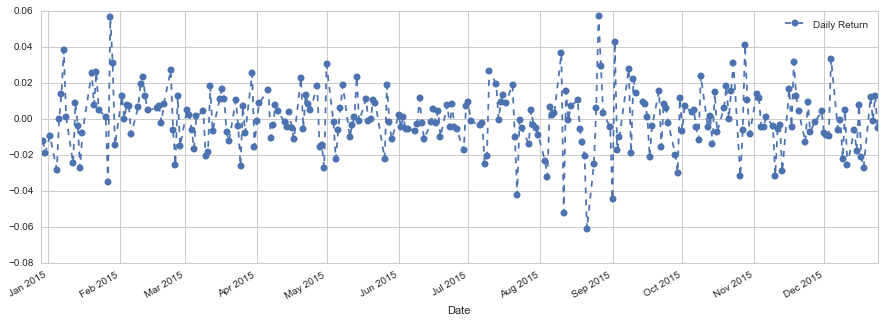

In [15]:
#daily returns as percent change
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True, linestyle='--', marker='o', figsize=(15,5))

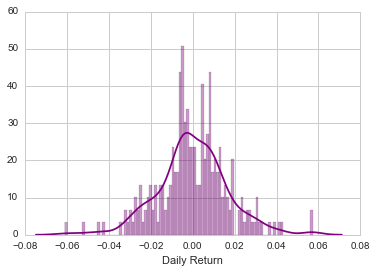

In [16]:
#distribution plot
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

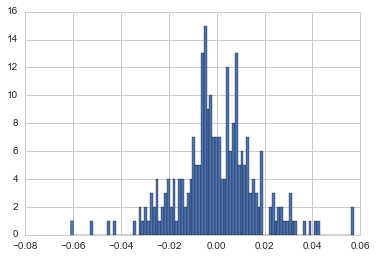

In [17]:
#pandas histogram as compared to seaborn's
AAPL['Daily Return'].hist(bins=100)

In [18]:
#make a dataframe combining Adjusted closing from a list of stocks
closing_df = data.DataReader(tech_list, 'yahoo',start, end)['Adj Close']

In [19]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-12-29,112.001681,312.040009,530.332426,46.192472
2014-12-30,110.634961,310.299988,530.422394,45.773867
2014-12-31,108.530812,310.350006,526.402397,45.218974
2015-01-02,107.498407,308.519989,524.812404,45.520756
2015-01-05,104.470005,302.190002,513.872306,45.102155


In [20]:
#make another dataframe of percent changes for each stock
tech_ret = closing_df.pct_change()

In [21]:
#see the results
tech_ret.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-12-29,NaN,NaN,NaN,NaN
2014-12-30,-0.012203,-0.005576,0.000170,-0.009062
2014-12-31,-0.019019,0.000161,-0.007579,-0.012122
2015-01-02,-0.009513,-0.005897,-0.003020,0.006674
2015-01-05,-0.028172,-0.020517,-0.020846,-0.009196


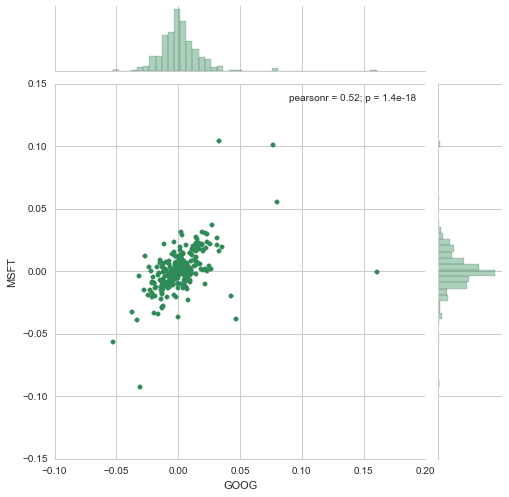

In [22]:
#compare daily returns of 2 stocks
#the Pearson value tells us how collrelated the two are
sns.jointplot('GOOG', 'MSFT', tech_ret, kind='scatter',color='seagreen', size=7)

C:\Users\Adam\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


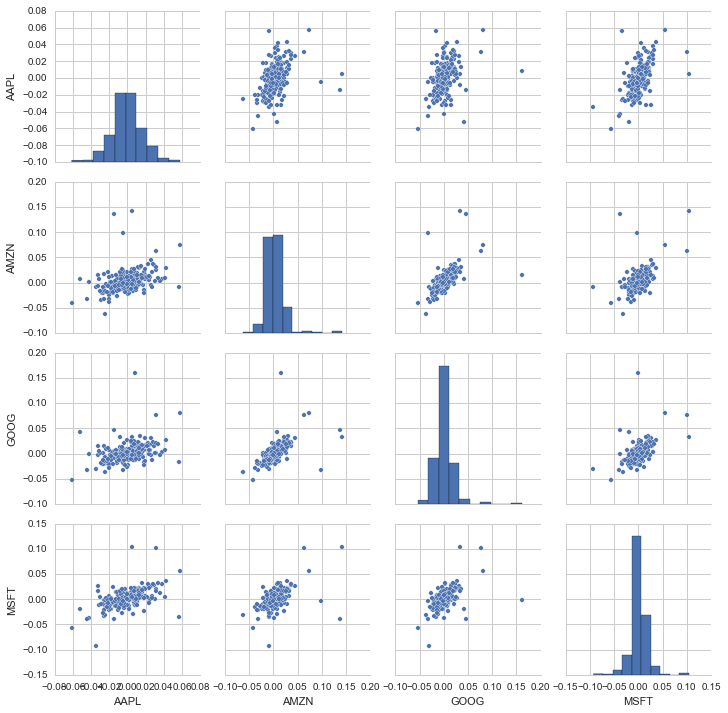

In [23]:
#use pairplot to see each column jointploted against each column
sns.pairplot(tech_ret.dropna())

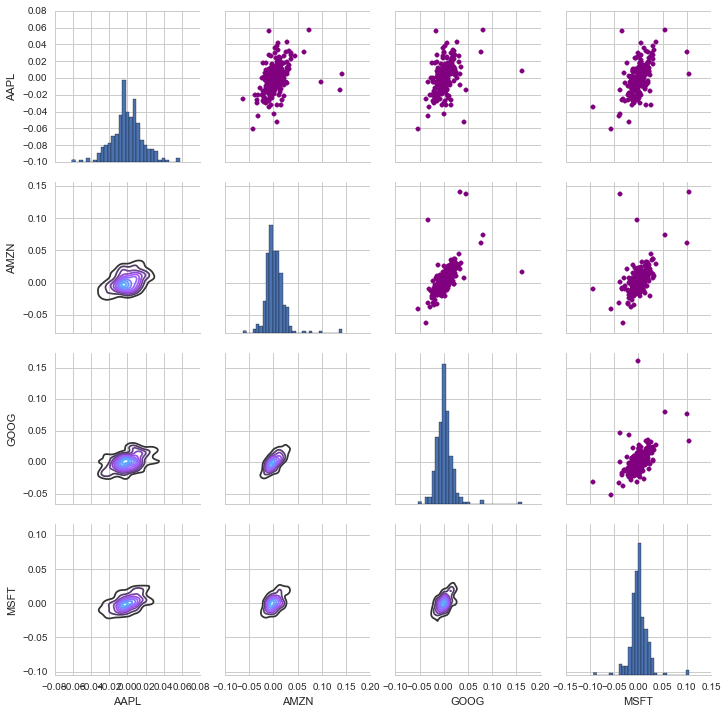

In [24]:
#look at return rates
#more powerful and customizable than pairplot, we choose scatter plots in the upper area
#histograms in the diagonal and camp kde graphs in the lower
return_fig = sns.PairGrid(tech_ret.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

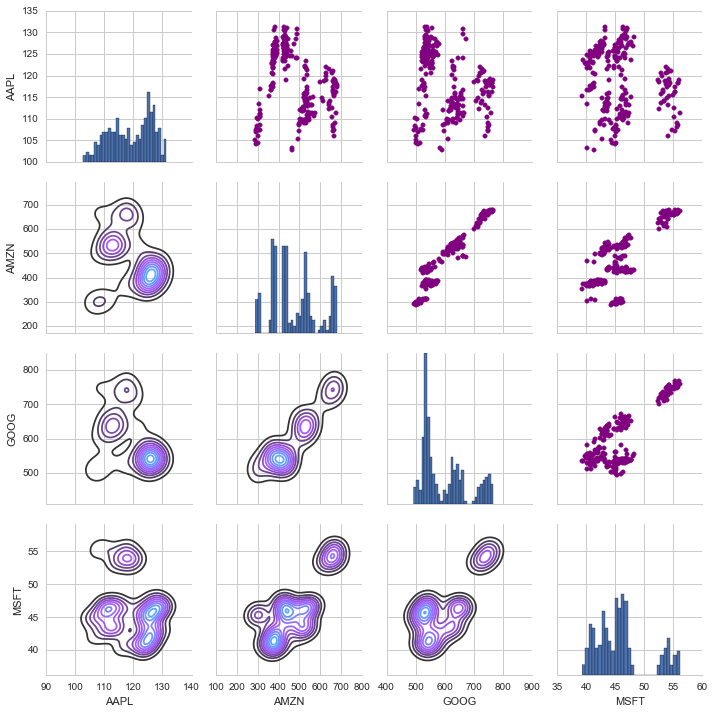

In [25]:
#looking at closing costs
return_fig = sns.PairGrid(closing_df)

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

C:\Users\Adam\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Adam\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


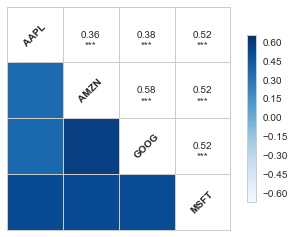

In [26]:
#see the correlation plot, depricated 
sns.corrplot(tech_ret.dropna(), cmap='Blues')

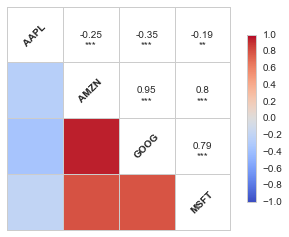

In [27]:
sns.corrplot(closing_df)

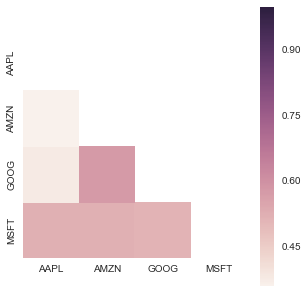

In [28]:
#seaborn has depricated corrplot so something like this will be requred going forward
#create a correlation dframe
corr_ret=tech_ret.corr()
#set up matplotlib figure
f, ax = plt.subplots(figsize=(5,5))
#make a mask for the upper triangle
mask=np.zeros_like(corr_ret, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#draw the heatmap with the mask and cmap we set up
sns.heatmap(corr_ret, ax=ax, square=True, mask=mask)

In [29]:
#find the risk
#fist make a dframe of the returns
rets= tech_ret.dropna()

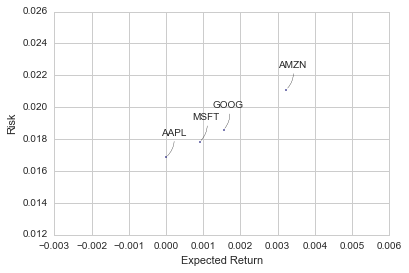

In [30]:
area=np.pi/2
#create a scatterplot of the mean, standard dev
plt.scatter(rets.mean(),rets.std(),s=area)
#set the labels
plt.xlabel("Expected Return")
plt.ylabel("Risk")
#set up annotations
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy= (x,y), xytext=(20,20),
        textcoords=('offset points'), ha='right', va='bottom',
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3'))

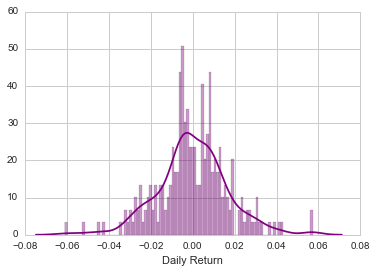

In [31]:
#estimating value at risk using bootstrap method
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [32]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-12-30,-0.012203,-0.005576,0.000170,-0.009062
2014-12-31,-0.019019,0.000161,-0.007579,-0.012122
2015-01-02,-0.009513,-0.005897,-0.003020,0.006674
2015-01-05,-0.028172,-0.020517,-0.020846,-0.009196
2015-01-06,0.000094,-0.022833,-0.023177,-0.014677


In [33]:
#find our value at risk using quantile, 95% of the time our money lost wont be worse than this for a given day
rets['AAPL'].quantile(0.05)

-0.027102627581681943

Montecarlo method

In [34]:
days = 365
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [35]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    dt = 1/days
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [36]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-12-29,532.192446,535.482414,530.013375,530.332426,2278500,530.332426
2014-12-30,528.092396,531.152424,527.132366,530.422394,876300,530.422394
2014-12-31,531.252429,532.602384,525.802363,526.402397,1368200,526.402397
2015-01-02,529.012399,531.272443,524.102327,524.812404,1447600,524.812404
2015-01-05,523.262377,524.332389,513.062315,513.872306,2059800,513.872306


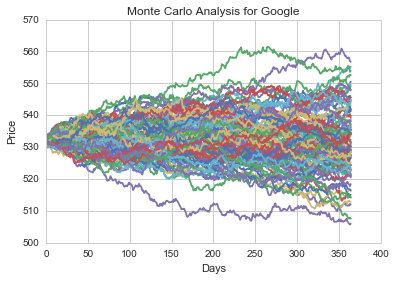

In [37]:
# Get start price from GOOG.head()
start_price = 532.19

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [38]:
runs = 1000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1] 

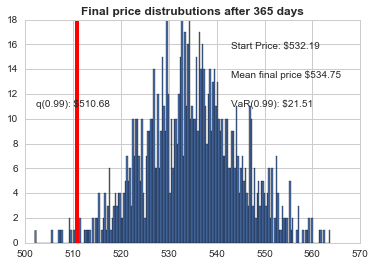

In [39]:
#we want 99% of our values
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)
#plot a line at the 1% quantile
plt.axvline(x=q, linewidth=4, color='r')
#title
plt.title('Final price distrubutions after %s days' % days, weight='bold')

#start price
plt.figtext(0.6,0.8,s='Start Price: $%.2f' %start_price)
#mean ending price
plt.figtext(0.6,0.7, 'Mean final price $%.2f' %simulations.mean())
#variance of the price with 99% confidence
plt.figtext(0.6,0.6, 'VaR(0.99): $%.2f' %(start_price-q))
#1% quartile
plt.figtext(0.15,0.6, 'q(0.99): $%.2f' %q)